In [1]:
import os
import sys
print('Python executable: ' + str(sys.executable))
print('Python version: ' + str(sys.version))
print('Working dir: ' + str(os.getcwd()))

Python executable: /opt/venv/tensorflow/bin/python3.6
Python version: 3.6.7 (default, Oct 22 2018, 11:32:17) 
[GCC 8.2.0]
Working dir: /media/data_old/documents/kennistechnologie/projects/kaggle/histopathologic_cancer_detection_2018_nov


In [35]:
#sys.path.append('src')

In [38]:
import numpy as np
import pandas as pd
import PIL
from PIL.Image import Image
from matplotlib.pyplot import imshow

from histopathologic.path_helper import PathHelper

In [3]:
%matplotlib inline

In [4]:
def get_subdir_path(subdir):
    return os.path.join(os.getcwd(), subdir)

def get_path_for_file_in_dataset(filename, dataset, preprocessed=False):
    path_dir = get_dir_for_dataset(dataset, preprocessed)
    return os.path.join(path_dir, filename)

def get_image_for_file(filepath):
    image_pillow = PIL.Image.open(filepath, 'r')
    return image_pillow

def save_image(image: Image, filepath: str) -> None:
    image.save(filepath)

def get_greyscale_for_image(image: Image) -> Image:
    assert isinstance(image, Image)
    greyscale_image = image.convert('L')
    return greyscale_image

def get_greyscale_image_for_file(filepath):
    image = get_image_for_file(filepath)
    greyscale_image = image.convert('L')
    return greyscale_image

def get_center_image(image: Image) -> Image:
    assert isinstance(image, Image)
    image_array = np.array(image)
    center_image_array = image_array[31:63, 31:63]
    center_image = PIL.Image.fromarray(center_image_array)
    return center_image

def get_array_for_file(filepath):
    image_pillow = PIL.Image.open(filepath, 'r')
    image_array = np.array(image_pillow)
    return image_array

def get_shape_from_image_file(filepath):
    image_array = get_array_for_file(filepath)
    return image_array.shape

def get_filename_with_postfix(filename: str, postfix: str) -> str:
    basename, extension = filename.split(sep='.')
    new_file_name = basename + postfix + '.' + extension
    return new_file_name

def add_processed_dir_to_filepath(filepath: str) -> str:
    new_filepath = os.path.join(os.path.dirname(filepath), 'preprocessed', os.path.basename(filepath))
    return new_filepath

def preprocess_and_save_file(filepath_in: str, filepath_out: str) -> None:
    image = get_image_for_file(filepath_in)
    #image = get_greyscale_for_image(image)
    image = get_center_image(image)    
    save_image(image, filepath_out)

def preprocess_samples_in_dir_to_dir(in_dir: str, to_dir: str, print_process_every_n_samples=10000) -> None:
    samples_files = os.listdir(in_dir)
    for i in range(len(samples_files)):
        if i % print_process_every_n_samples == 0:
            print('Converting {} of {}'.format(i, len(samples_files)))   
        file = samples_files[i]
        filepath_in = os.path.join(in_dir, file)
        filepath_out = os.path.join(to_dir, file)
        preprocess_and_save_file(filepath_in, filepath_out)

def preprocess_dataset(dataset: str) -> None:
    files_dir_in = get_dir_for_dataset(dataset)
    files_dir_out = get_dir_for_dataset(dataset, preprocessed=True)
    preprocess_samples_in_dir_to_dir(files_dir_in, files_dir_out)

def load_dataset_from_path(filepath):
    print('Loading dataset from: ' + str(filepath))
    dataset = np.load(filepath)
    print('Loaded dataset shape: ' + str(dataset.shape))
    return dataset
    
def save_dataset_to_path(dataset, filepath):
    print('Saving dataset of shape "{}" to: {} '.format(dataset.shape, filepath))
    np.save(filepath, dataset)

def load_train_dataset_from_samples_and_labels(samples_dir: str, filepath_labels, print_progress_every_n_samples=10000):  
    print('Loading dataset with samples from "{}" and labels from "{}"'.format(samples_dir, filepath_labels))
    labels = pd.read_csv(filepath_labels, delimiter=",")
    
    sample_file, _ = labels.iloc[0]
    sample_filepath = os.path.join(samples_dir, sample_file + '.tif')
    image_shape = get_shape_from_image_file(sample_filepath)
    dataset_shape = (labels.shape[0], image_shape[0], image_shape[1], image_shape[2])
    
    dataset = np.zeros(dataset_shape, dtype=np.uint8)
    dataset_labels = np.zeros((dataset_shape[0], 1), dtype=np.uint8)
    for i in range(len(labels)):
        if i % print_progress_every_n_samples == 0:
            print('Loading {} of {}'.format(i, len(labels)))
        sample_name, sample_label = labels.iloc[i]        
        sample_filepath = os.path.join(samples_dir, sample_name + '.tif')
        image_array = get_array_for_file(sample_filepath)        
        dataset[i] = image_array
        dataset_labels[i] = sample_label
    
    print('Resulting dataset shape: ' + str(dataset.shape))
    print('Resulting labels shape: ' + str(dataset_labels.shape))
    
    return dataset, dataset_labels

In [41]:
train_samples_files = os.listdir(PathHelper.get_dir_for_dataset('train'))
test_samples_files = os.listdir(PathHelper.get_dir_for_dataset('test'))

In [40]:
print('# Train samples: ' + str(len(train_samples_files)))
print('# Test samples: ' + str(len(test_samples_files)))

# Train samples: 220025
# Test samples: 57458


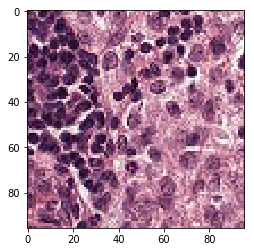

In [7]:
sample_file = train_samples_files[0]
sample_filepath = get_path_for_file_in_dataset(sample_file, 'train')
image = get_image_for_file(sample_filepath)
imshow(image)

# Preprocess

In [279]:
preprocess = False
if preprocess:    
    preprocess_dataset('train')
    preprocess_dataset('test')

Converting 0 of 220025
Converting 10000 of 220025
Converting 20000 of 220025
Converting 30000 of 220025
Converting 40000 of 220025
Converting 50000 of 220025
Converting 60000 of 220025
Converting 70000 of 220025
Converting 80000 of 220025
Converting 90000 of 220025
Converting 100000 of 220025
Converting 110000 of 220025
Converting 120000 of 220025
Converting 130000 of 220025
Converting 140000 of 220025
Converting 150000 of 220025
Converting 160000 of 220025
Converting 170000 of 220025
Converting 180000 of 220025
Converting 190000 of 220025
Converting 200000 of 220025
Converting 210000 of 220025
Converting 220000 of 220025


data/train/preprocessed/samples/a3858960739468450106f7484b30440391a8caef.tif


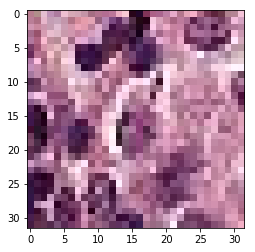

In [287]:
preprocessed_train_samples_files_dir = get_dir_for_dataset('train', preprocessed=True)
preprocessed_train_samples_files = os.listdir(preprocessed_train_samples_files_dir)
sample_file = preprocessed_train_samples_files[0]
sample_filedir = preprocessed_train_samples_files_dir
sample_filepath = os.path.join(sample_filedir, sample_file)
print(sample_filepath)
image = get_image_for_file(sample_filepath)
imshow(image)

In [286]:
np.array(image).shape

(32, 32, 3)

# Load data

## From samples

In [288]:
load_from_samples = True
if load_from_samples:
    dataset = 'train'
    preprocessed = True
    filepath_labels = os.path.join(DATA_DIR, TRAIN_DATA_SUBDIR, LABEL_SUBDIR, 'train_labels.csv')
    samples_dir = get_dir_for_dataset(dataset, preprocessed)
    dataset, dataset_labels = load_train_dataset_from_samples_and_labels(samples_dir, filepath_labels)

Loading dataset with samples from "data/train/preprocessed/samples" and labels from "data/train/labels/train_labels.csv"
Loading 0 of 220025
Loading 10000 of 220025
Loading 20000 of 220025
Loading 30000 of 220025
Loading 40000 of 220025
Loading 50000 of 220025
Loading 60000 of 220025
Loading 70000 of 220025
Loading 80000 of 220025
Loading 90000 of 220025
Loading 100000 of 220025
Loading 110000 of 220025
Loading 120000 of 220025
Loading 130000 of 220025
Loading 140000 of 220025
Loading 150000 of 220025
Loading 160000 of 220025
Loading 170000 of 220025
Loading 180000 of 220025
Loading 190000 of 220025
Loading 200000 of 220025
Loading 210000 of 220025
Loading 220000 of 220025
Resulting dataset shape: (220025, 32, 32, 3)
Resulting labels shape: (220025, 1)


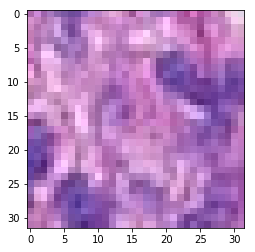

In [289]:
imshow(PIL.Image.fromarray(dataset[3]))

In [290]:
from sys import getsizeof
getsizeof(dataset) / 1024

660075.140625

## Save full datasets

In [291]:
convert_to_single_dataset = True
dataset_name = 'train'
preprocessed=True
full_dataset=True
if convert_to_single_dataset:    
    # Save dataset
    save_dir = get_dir_for_dataset('train', preprocessed, full_dataset)    
    filename = 'dataset.npy'
    filepath = os.path.join(save_dir, filename)
    save_dataset_to_path(dataset, filepath)
    
    # Save labels
    save_dir = get_dir_for_dataset('train', preprocessed, full_dataset, labels=True)  
    filename = 'dataset_labels.npy'
    filepath = os.path.join(save_dir, filename)
    save_dataset_to_path(dataset_labels, filepath)

Saving dataset of shape "(220025, 32, 32, 3)" to: data/train/preprocessed/dataset/dataset.npy 
Saving dataset of shape "(220025, 1)" to: data/train/labels/dataset_labels.npy 


## Load from full datasets

In [5]:
load_from_full_dataset = True
dataset_name = 'train'
preprocessed=True
full_dataset=True
if load_from_full_dataset:    
    # Save dataset
    save_dir = get_dir_for_dataset('train', preprocessed, full_dataset)    
    filename = 'dataset.npy'
    filepath = os.path.join(save_dir, filename)
    dataset = load_dataset_from_path(filepath)
    
    # Save labels
    save_dir = get_dir_for_dataset('train', preprocessed, full_dataset, labels=True)  
    filename = 'dataset_labels.npy'
    filepath = os.path.join(save_dir, filename)
    dataset_labels = load_dataset_from_path(filepath)

Loading dataset from: data/train/preprocessed/dataset/dataset.npy
Loaded dataset shape: (220025, 32, 32, 3)
Loading dataset from: data/train/labels/dataset_labels.npy
Loaded dataset shape: (220025, 1)


In [6]:
reshape = False
if reshape:
    dataset = dataset.reshape(dataset.shape[0], dataset.shape[1], dataset.shape[2], 1)
    dataset.shape

In [26]:
from sys import getsizeof
print('Dataset shape: ' + str(dataset.shape) + ', Labels: ' + str(dataset.shape))
print('Dataset size: ' + str(round(getsizeof(dataset) / (1024 * 1024 * 1024), 2)) + 'GB')

Dataset shape: (220025, 32, 32, 3), Labels: (220025, 32, 32, 3)
Dataset size: 0.63GB


# Data splits

In [27]:
train_pct = 70
valid_pct = 30

In [28]:
idx_all = np.arange(len(dataset))
np.random.seed(81)
np.random.shuffle(idx_all)

In [29]:
idx_train_from = 0
idx_train_to = np.math.floor(0.7 * len(dataset))
idx_valid_from = idx_train_to + 1
idx_valid_to = len(dataset) - 1

In [30]:
idx_train = idx_all[idx_train_from:idx_train_to]
idx_valid = idx_all[idx_valid_from:idx_valid_to]

In [31]:
print('Train: ' + str(len(idx_train) / len(idx_all)))
print('Valid: ' + str(len(idx_valid) / len(idx_all)))

Train: 0.6999977275309623
Valid: 0.29999318259288715


In [32]:
dataset_train = dataset[idx_train]
dataset_train_labels = dataset_labels[idx_train]
dataset_valid = dataset[idx_valid]
dataset_valid_labels = dataset_labels[idx_valid]

In [33]:
dataset_train_labels[0:10]

array([[1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0]], dtype=uint8)

In [13]:
np.sum(dataset_labels)

89117

In [14]:
batch_size=32
n_samples_cut = len(dataset_train) % batch_size
samples_index = range(len(dataset_train))
samples_index = samples_index[:-n_samples_cut]

dataset_train = dataset_train[samples_index]
dataset_train_labels = dataset_train_labels[samples_index]

In [15]:
n_samples_cut = len(dataset_valid) % batch_size
samples_index = range(len(dataset_valid))
samples_index = samples_index[:-n_samples_cut]

dataset_valid = dataset_valid[samples_index]
dataset_valid_labels = dataset_valid_labels[samples_index]

In [16]:
print('Train: ' + str(dataset_train.shape) + ' Labels: ' + str(dataset_train_labels.shape))
print('valid: ' + str(dataset_valid.shape))

Train: (154016, 32, 32, 3) Labels: (154016, 1)
valid: (65984, 32, 32, 3)


# Tensorflow

In [149]:
import tensorflow as tf
print('Tensorflow: ' + str(tf.__version__))

Tensorflow: 1.12.0


In [55]:
X = tf.placeholder(tf.float16, (32, 32))
Z1 = tf.layers.dense(X, units=1)
A1 = tf.sigmoid(Z1)

In [49]:
session = tf.Session()
init = tf.global_variables_initializer()
session.run(init)

In [50]:
session.run(A1)

 # Keras

In [17]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
print('Tensorflow: ' + str(tf.__version__))
print('Keras: ' + str(keras.__version__))

Tensorflow: 1.12.0
Keras: 2.1.6-tf


In [18]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())
from keras import backend as K
K.tensorflow_backend._get_available_gpus()

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 6028005759825379750
, name: "/device:XLA_GPU:0"
device_type: "XLA_GPU"
memory_limit: 17179869184
locality {
}
incarnation: 10603279029409230139
physical_device_desc: "device: XLA_GPU device"
, name: "/device:XLA_CPU:0"
device_type: "XLA_CPU"
memory_limit: 17179869184
locality {
}
incarnation: 2802806023797228123
physical_device_desc: "device: XLA_CPU device"
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 6921977856
locality {
  bus_id: 1
  links {
  }
}
incarnation: 7113043482357093323
physical_device_desc: "device: 0, name: GeForce RTX 2070, pci bus id: 0000:01:00.0, compute capability: 7.5"
]


Using TensorFlow backend.


['/job:localhost/replica:0/task:0/device:GPU:0']

## Single layer NN

In [18]:
model = tf.keras.Sequential()
model.add(layers.Dense(1, input_dim=1024, kernel_initializer='normal', activation='sigmoid'))

In [19]:
model.compile(optimizer=tf.train.AdamOptimizer(0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [20]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 1025      
Total params: 1,025
Trainable params: 1,025
Non-trainable params: 0
_________________________________________________________________


In [21]:
dataset_train_flatten = dataset_train.reshape(dataset_train.shape[0], dataset_train.shape[1] * dataset_train.shape[2])
dataset_train_flatten.shape

ValueError: cannot reshape array of size 473137152 into shape (154016,1024)

In [199]:
model.fit(dataset_train_flatten, dataset_train_labels, epochs=3, batch_size=batch_size)

Epoch 1/3
154016/154016 [==============================] - 10s 63us/step - loss: 6.5337 - acc: 0.5946
Epoch 2/3
154016/154016 [==============================] - 9s 61us/step - loss: 6.5141 - acc: 0.5959
Epoch 3/3
154016/154016 [==============================] - 10s 62us/step - loss: 6.5141 - acc: 0.5959


## Multilayer NN

In [204]:
model = tf.keras.Sequential()
model.add(layers.Dense(1024, input_dim=1024, activation='relu'))
model.add(layers.Dense(1, kernel_initializer='normal', activation='sigmoid'))

In [205]:
model.compile(optimizer=tf.train.AdamOptimizer(0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [206]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_26 (Dense)             (None, 1024)              1049600   
_________________________________________________________________
dense_27 (Dense)             (None, 1)                 1025      
Total params: 1,050,625
Trainable params: 1,050,625
Non-trainable params: 0
_________________________________________________________________


In [207]:
model.fit(dataset_train_flatten, dataset_train_labels, epochs=3, batch_size=batch_size)

Epoch 1/3
154016/154016 [==============================] - 11s 73us/step - loss: 6.5141 - acc: 0.5959
Epoch 2/3
154016/154016 [==============================] - 11s 72us/step - loss: 6.5141 - acc: 0.5959
Epoch 3/3
154016/154016 [==============================] - 11s 72us/step - loss: 6.5141 - acc: 0.5959


## Convolutional Neural Network

In [52]:
import tensorflow as tf
from keras import layers, Sequential
from keras.layers import Dropout, Dense, BatchNormalization, MaxPooling2D, Flatten, InputLayer
from keras.layers.convolutional import Conv2D

In [33]:
model = Sequential()
model.add(BatchNormalization(input_shape=(32, 32, 3)))
model.add(Conv2D(32, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(64, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))
model.add(Conv2D(128, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(64, kernel_size=(1, 1), padding='same', activation='relu'))
model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))

In [90]:
model = Sequential()
model.add(InputLayer(input_shape=(32, 32, 3)))
model.add(BatchNormalization())
model.add(Conv2D(4, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(1024, activation='relu'))
model.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))

In [91]:
model.compile(optimizer=tf.train.AdamOptimizer(0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [92]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization_7 (Batch (None, 32, 32, 3)         12        
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 32, 32, 4)         112       
_________________________________________________________________
flatten_12 (Flatten)         (None, 4096)              0         
_________________________________________________________________
dropout_13 (Dropout)         (None, 4096)              0         
_________________________________________________________________
dense_25 (Dense)             (None, 1024)              4195328   
_________________________________________________________________
dense_26 (Dense)             (None, 1)                 1025      
Total params: 4,196,477
Trainable params: 4,196,471
Non-trainable params: 6
_________________________________________________________________


In [68]:
epochs = 3
batch_size=256
model.fit(x=dataset_train, y=dataset_train_labels, epochs=epochs, batch_size=batch_size)

Epoch 1/3
154016/154016 [==============================] - 5s 33us/step - loss: 0.5448 - acc: 0.7358
Epoch 2/3
154016/154016 [==============================] - 4s 28us/step - loss: 0.4796 - acc: 0.7780
Epoch 3/3
154016/154016 [==============================] - 4s 28us/step - loss: 0.4461 - acc: 0.7969


# Evaluate 

In [69]:
model.evaluate(dataset_train, dataset_train_labels, batch_size=batch_size)

154016/154016 [==============================] - 3s 18us/step


[0.43764204309458743, 0.8037281840600022]

In [70]:
model.evaluate(dataset_valid, dataset_valid_labels, batch_size=batch_size)

65984/65984 [==============================] - 1s 17us/step


[0.4631225170150298, 0.7895550435891323]

In [363]:
result = model.predict(dataset_valid, batch_size=batch_size)
print(result.shape)

(65984, 1)


# Predict

In [104]:
predicted_classes = model.predict_classes(dataset_valid)
predicted_probabilities = model.predict_proba(dataset_valid)

In [105]:
predicted_classes.shape

(65984, 1)

In [106]:
np.sum(predicted_classes)

307

In [107]:
predicted_probabilities.shape

(65984, 1)

# Confusion Matrix

In [108]:
from sklearn.metrics import roc_auc_score, confusion_matrix

In [109]:
confusion_matrix(dataset_valid_labels, predicted_classes)

array([[38830,   292],
       [26847,    15]])

# AUC

In [110]:
roc_auc_score(dataset_valid_labels, predicted_probabilities)

0.44142371464942814

# CNN Realtime data augmentation

In [73]:
from keras.preprocessing.image import ImageDataGenerator

In [74]:
print('Train dataset shape: ' + str(dataset_train.shape))
print('Train dataset labels shape: ' + str(dataset_train_labels.shape))

Train dataset shape: (154016, 32, 32, 3)
Train dataset labels shape: (154016, 1)


In [93]:
datagenerator = ImageDataGenerator(
    featurewise_center=True,
    featurewise_std_normalization=True,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True)

In [94]:
# compute quantities required for featurewise normalization
# (std, mean, and principal components if ZCA whitening is applied)
datagenerator.fit(dataset_train)

In [95]:
# fits the model on batches with real-time data augmentation:
epochs = 1
batch_size = 256
steps_per_epoch = len(dataset_train) / batch_size
print('Steps per epoch: ' + str(steps_per_epoch))

Steps per epoch: 601.625


## Train model

In [96]:
data_iterator = datagenerator.flow(x=dataset_train, y=dataset_train_labels, batch_size=batch_size)
model.fit_generator(data_iterator, steps_per_epoch=steps_per_epoch, epochs=epochs)

Epoch 1/1
602/601 [==============================] - 56s 93ms/step - loss: 0.9363 - acc: 0.6998


## Evaluate model on train set

In [97]:
datagenerator = ImageDataGenerator(
    featurewise_center=True,
    featurewise_std_normalization=True)

In [98]:
datagenerator.fit(dataset_train)

In [99]:
data_iterator = datagenerator.flow(x=dataset_train, y=dataset_train_labels, batch_size=batch_size)

In [100]:
steps = data_iterator.n / data_iterator.batch_size
model.evaluate_generator(data_iterator, steps=steps, verbose=1)

602/601 [==============================] - 6s 9ms/step


[0.5239950958418792, 0.742059266569707]

In [101]:
datagenerator = ImageDataGenerator(
    featurewise_center=True,
    featurewise_std_normalization=True)

In [102]:
datagenerator.fit(dataset_valid)
data_iterator = datagenerator.flow(x=dataset_valid, y=dataset_valid_labels, batch_size=batch_size)

In [103]:
steps = data_iterator.n / data_iterator.batch_size
model.evaluate_generator(data_iterator, steps=steps, verbose=1)

258/257 [==============================] - 2s 9ms/step


[0.5309237111088839, 0.7461657371483996]

In [425]:
datagenerator.